In [2]:
# Import modules and subroutines:

include("../subroutines/Subroutines.jl");

3.10.9


In [23]:
function h6_xyz(bl)
    
    a = """
    6

    H $(bl) 0.0 0.0 
    H -$(bl) 0.0 0.0 
    H 0.0 $(bl) 0.0 
    H 0.0 -$(bl) 0.0 
    H 0.0 0.0 $(bl) 
    H 0.0 0.0 -$(bl) 
    """
    
    fpath = "../configs/xyz_files/h6_octahedron/$(bl).xyz"

    write(fpath, a)
    
end

h6_xyz (generic function with 1 method)

In [7]:
bond_lengths = [1.2,1.21,1.22,1.23,1.24,1.25,1.252,1.254,1.256,1.258,1.26,1.262,1.264,1.266,1.268,1.27,1.272,1.274,1.276,1.278,1.28,1.282,1.284,1.286,1.288,1.29,1.292,1.294,1.296,1.298,1.3,1.32,1.34,1.36,1.38,1.4];

In [ ]:
for bl in bond_lengths
    h6_xyz(bl)
end

LoadError: UndefVarError: Be2_xyz not defined

In [3]:
# Generate some chemical data:

#bond_lengths = [i/20 for i=10:40]

py"""

config = configparser.ConfigParser()
config.read(wd+'/../configs/pyscf_configs/h6_octahedron_sto3g_1p8a_perturbed.ini')
RunPySCF.RunPySCF(config, nosec=True)

"""

True
converged SCF energy = -2.7853580851049
converged SCF energy = -2.105199197379
converged SCF energy = -2.10519919747618
E(MP2) = -2.45435151602172  E_corr = -0.349152318545543


In [10]:
# Load the chemical data into julia as an array of chemical data structs:
# (one struct obtained for each molecular geometry as set up in the config file)

bond_lengths = [i/20 for i=10:40]

md_fname = "h6_sto3g_020524%1552.hdf5"

chemical_data_list = ReadIn("../datasets/pyscf_data/"*md_fname)

PrintChemData(chemical_data_list[10])

Molecule name: h6
Basis set: sto3g
Molecular geometry: ../configs/xyz_files/h6_octahedron/0.95.xyz
RHF energy: -2.5522990394405545
FCI energy: -2.7708424729138015


In [11]:
e_rhf_vec = [chemical_data_list[m].e_rhf for m=1:length(chemical_data_list)]
e_fci_vec = [chemical_data_list[m].e_fci for m=1:length(chemical_data_list)]

31-element Vector{Float64}:
 -1.6252356304624662
 -1.9860956717004292
 -2.23856867136411
 -2.41506464527788
 -2.53763856513841
 -2.6237659009333116
 -2.6846695725733305
 -2.7258658998929812
 -2.7531659618970377
 -2.7708424729138015
 -2.7820404177977744
 -2.789047562508194
 -2.793473121599357
  ⋮
 -2.809768105130185
 -2.8096947917078627
 -2.8091271666679294
 -2.80827595610313
 -2.8072907442606865
 -2.8062733859373297
 -2.805289584191066
 -2.804378533819741
 -2.803560657489615
 -2.8028435879917546
 -2.802226637287348
 -2.801704029762918

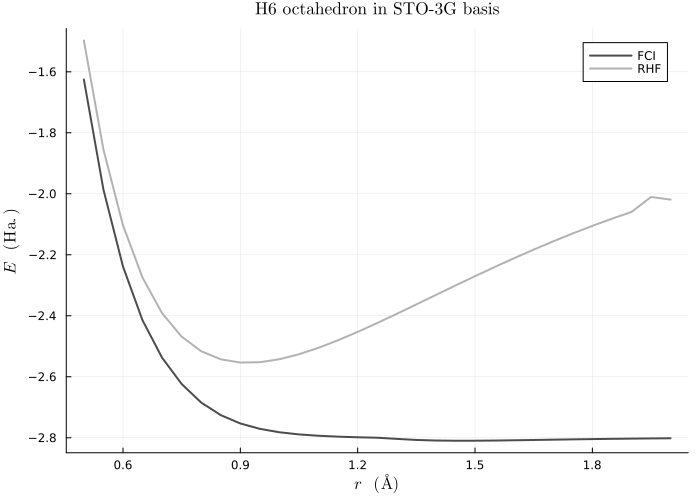

In [12]:
using LaTeXStrings

plt1 = plot(
    bond_lengths, 
    e_fci_vec, 
    color=RGB(0.3,0.3,0.3),
    linewidth=2.0,
    label="FCI",
    title="H6 octahedron in STO-3G basis",
    titlefontsize=11.0,
    titlefont=font(14,"Computer Modern"),
    xguide=L"r\quad(\AA)",
    yguide=L"E\quad(\textrm{Ha.})",
    size=(700,500)
)

plot!(
    bond_lengths, 
    e_rhf_vec, 
    color=RGB(0.7,0.7,0.7), 
    linewidth=2.0,
    label="RHF"
)

display(plt1)

#savefig("../plots/H6_Octahedron/RHF-to-FCI_comparison.pdf")
